# inter-run comparisons of N contained in phytoplankton
    - S3
    - Sentry Shoal
    - Central Node
    - JDF

In [1]:
import pandas as pd
import netCDF4 as nc
import datetime as dt
import subprocess
import requests
import matplotlib.pyplot as plt
import cmocean
import numpy as np
import os
import re
import dateutil as dutil
from salishsea_tools import viz_tools, places, geo_tools, evaltools as et
import glob
import pickle
import matplotlib.dates as mdates
import matplotlib as mpl
import pytz
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=16) 
mpl.rc('legend', fontsize=16) 
mpl.rc('axes', titlesize=16) 
mpl.rc('figure', titlesize=16) 
mpl.rc('axes', labelsize=16) 
mpl.rc('font', size=16) 

mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['legend.numpoints'] = 1
%matplotlib inline

In [2]:
plist=['Sentry Shoal','S3','Central node','Central SJDF']

In [3]:
## full list: flist=['search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20120509T231233Z_20130117T052029Z-clean.csv',
#       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20130117T052039Z_20131214T042429Z-clean.csv',
#       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20131214T042439Z_20140804T234320Z-clean.csv',
#       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20140804T234330Z_20150604T070614Z-clean.csv',
#       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20150604T070624Z_20160307T160206Z-clean.csv',
#       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20160307T160215Z_20161019T064047Z-clean.csv',
#       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20161019T064056Z_20161115T220747Z-clean.csv',
#       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv',
#       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv',
#       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170404T195131Z_20170426T173215Z-clean.csv',
#       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170426T173216Z_20170522T011843Z-clean.csv',
#       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170522T011844Z_20170611T234016Z-clean.csv',
#       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170611T234017Z_20170702T172228Z-clean.csv',
#       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170722T182607Z_20170815T213737Z-clean.csv',
#       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170815T213738Z_20170825T225506Z-clean.csv',
#       'search7672208/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170825T225507Z_20170923T032427Z-clean.csv',
#       'search7672208/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170923T032428Z_20171016T213134Z-clean.csv',
#       'search7672208/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20171016T213135Z_20180108T160335Z-clean.csv',
#       'search7672208/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20180220T145337Z_20180313T223206Z-clean.csv',
#       'search7672208/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20180313T223207Z_20180404T024033Z-clean.csv',
#       'search7672208/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20180404T024034Z_20180509T210327Z-clean.csv']
flist=['search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20130117T052039Z_20131214T042429Z-clean.csv',
       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20131214T042439Z_20140804T234320Z-clean.csv',
       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20140804T234330Z_20150604T070614Z-clean.csv',
       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20150604T070624Z_20160307T160206Z-clean.csv',
       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20160307T160215Z_20161019T064047Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170404T195131Z_20170426T173215Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170426T173216Z_20170522T011843Z-clean.csv',
       'search7672208/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20180220T145337Z_20180313T223206Z-clean.csv',
       'search7672208/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20180313T223207Z_20180404T024033Z-clean.csv',
       'search7672208/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20180404T024034Z_20180509T210327Z-clean.csv']
slist=[78,78,78,78,78,66,66,66,66,59,59,59]
dfs=list()
for ii in range(0,len(flist)):
    print(flist[ii])
    dfs.append(pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/'+flist[ii],
        skiprows=slist[ii],header=None,usecols=[0,1,2,3,4,5,6,7,8,9,10],
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'),na_values=' NaN'))

df=pd.concat(dfs,ignore_index=True)
df.drop(df[df.ChlQC > 2].index, inplace=True)
df.reset_index(inplace=True)
dts=[dt.datetime(int(r[0:4]),int(r[5:7]),int(r[8:10]),int(r[11:13]),int(r[14:16]),int(r[17:19])) for r in df['TimeUTC']]
df=df.assign(dtUTC=dts)
#df['Lat']=pd.to_numeric(df['Lat'],errors='coerce')
#df['Lon']=pd.to_numeric(df['Lon'],errors='coerce')
#df['Chlorophyll_ug']=pd.to_numeric(df['Chlorophyll_ug'],errors='coerce')
print('totlen=',len(df))

search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20130117T052039Z_20131214T042429Z-clean.csv
search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20131214T042439Z_20140804T234320Z-clean.csv
search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20140804T234330Z_20150604T070614Z-clean.csv
search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20150604T070624Z_20160307T160206Z-clean.csv
search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20160307T160215Z_20161019T064047Z-clean.csv
search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv
search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv
search4979680/BritishColumb

In [4]:
df.head()

,index,TimeUTC,CDOM,CDOMQC,Chlorophyll_ug,ChlQC,Turbidity_NTU,TurbQC,Lat,LatQC,Lon,LongQC,dtUTC
0,0,2013-01-17T05:20:39.819Z,9.4080,0,1.5367,0,5.2128,0,49.137236,8,-123.539987,8,2013-01-17 05:20:39
1,1,2013-01-17T05:20:49.994Z,9.4976,0,1.4883,0,5.1404,0,49.137703,8,-123.541167,8,2013-01-17 05:20:49
2,2,2013-01-17T05:21:00.169Z,9.4080,0,1.5125,0,5.0680,0,49.138129,8,-123.542221,8,2013-01-17 05:21:00
3,3,2013-01-17T05:21:10.343Z,9.4976,0,1.4883,0,5.2128,0,49.138452,8,-123.543240,8,2013-01-17 05:21:10
4,4,2013-01-17T05:21:19.386Z,9.4080,0,1.5004,0,5.1404,0,49.138872,8,-123.544143,8,2013-01-17 05:21:19


In [5]:
df['Lon'][1]

-123.541167459

In [6]:
df['dtUTC'][0].month

1

In [7]:
places.PLACES['S3']

{'lon lat': (-123.558, 49.125),
 'NEMO grid ji': (450, 258),
 'GEM2.5 grid ji': (138, 144)}

In [8]:
S3la=places.PLACES['S3']['lon lat'][1]
S3lo=places.PLACES['S3']['lon lat'][0]

In [11]:
df=df.loc[(df.Chlorophyll_ug>=0)&(df.Lat>S3la-2/111)&(df.Lat<S3la+2/111)&\
          (df.Lon>S3lo-2/111/np.cos(np.pi/180*49.1))&(df.Lon<S3lo+2/111/np.cos(np.pi/180*49.1))].copy(deep=True)

In [12]:
month=[ii.month for ii in df['dtUTC']]

In [13]:
df=df.assign(month=month)

In [14]:
df.drop(df[~((df.month==3) | (df.month==4))].index, inplace=True)
df.reset_index(inplace=True)

In [15]:
yr=[ii.year for ii in df['dtUTC']]
df=df.assign(year=yr)

In [16]:
df2=df.groupby(['year'])['Chlorophyll_ug'].mean()

In [17]:
df2

year
2013    3.507774
2014    4.304820
2015    7.613079
2016    3.531342
2017    7.239005
2018    5.742905
Name: Chlorophyll_ug, dtype: float64

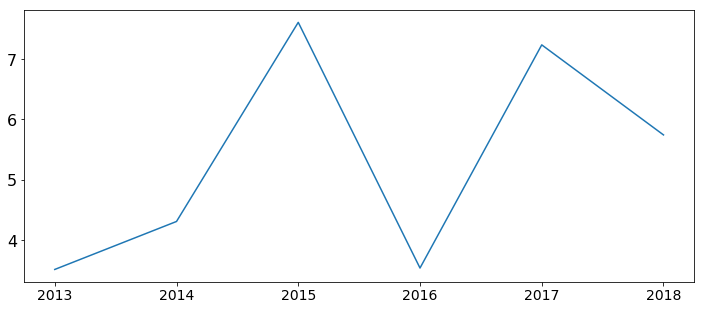

In [18]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
ax.plot(df2)